<a href="https://www.kaggle.com/code/songglodtan/predict-survival-on-the-titanic-python?scriptVersionId=118508855" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk("/kaggle/input"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Import dataset
there are 2 datasets
* train.csv
* test.csv

In [2]:
train_path = "/kaggle/input/titanic/train.csv"
test_path = "/kaggle/input/titanic/test.csv"

df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

# Inspect the data

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

## train dataset

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df_train["Pclass"] = df_train["Pclass"].astype(str)

In [7]:
df_train.isna().sum()[df_train.isna().sum() > 0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [8]:
df_train.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='Age', ylabel='Pclass'>

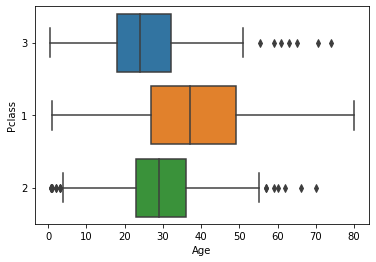

In [9]:
sns.boxplot(
    data = df_train,
    x = "Age", 
    y = "Pclass"
)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

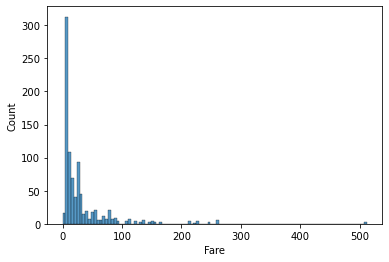

In [10]:
sns.histplot(
    data = df_train,
    x = "Fare"
)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

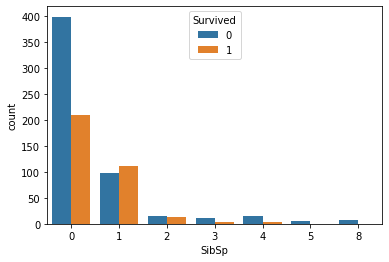

In [11]:
sns.countplot(
    data = df_train,
    x = "SibSp",
    hue = "Survived"
)

<AxesSubplot:xlabel='Parch', ylabel='count'>

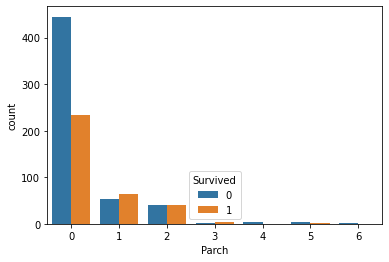

In [12]:
sns.countplot(
    data = df_train,
    x = "Parch",
    hue = "Survived"
)

<AxesSubplot:xlabel='Age', ylabel='Count'>

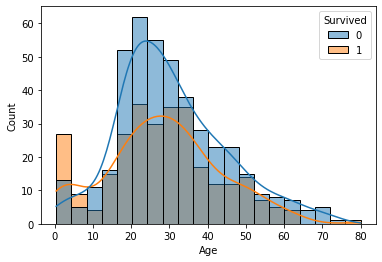

In [13]:
sns.histplot(
    data = df_train,
    x = "Age",
    hue = "Survived",
    kde = True
)

In [14]:
for pclass in df_train["Pclass"].unique():
    age_median = df_train.loc[df_train["Pclass"] == pclass, "Age"].median()
    print("Class", pclass, ":", age_median)

Class 3 : 24.0
Class 1 : 37.0
Class 2 : 29.0


In [15]:
# For further use
age_median = {
    "1": 37,
    "2": 29,
    "3": 24
}

<AxesSubplot:xlabel='Fare', ylabel='Pclass'>

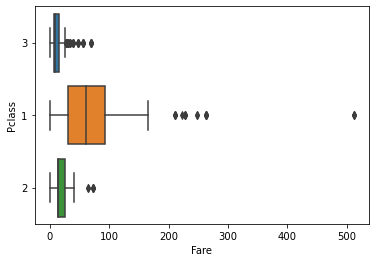

In [16]:
sns.boxplot(
    data = df_train,
    x = "Fare", 
    y = "Pclass"
)

<AxesSubplot:xlabel='Survived', ylabel='count'>

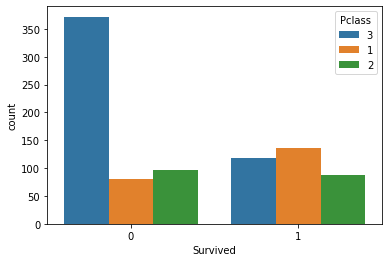

In [17]:
sns.countplot(
    data = df_train,
    x = "Survived",
    hue = "Pclass"
)

In [18]:
df_train.groupby(["Pclass", "Survived"]).size()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

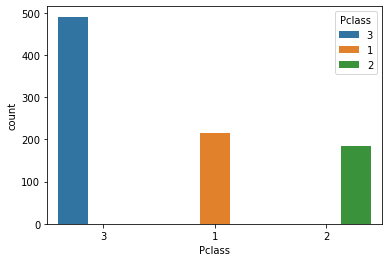

In [19]:
sns.countplot(
    data = df_train,
    x = "Pclass",
    hue = "Pclass"
)

<AxesSubplot:xlabel='Sex', ylabel='count'>

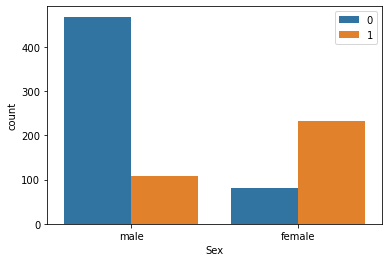

In [20]:
sns.countplot(
    x = df_train["Sex"],
    hue = pd.Categorical(df_train["Survived"])
)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

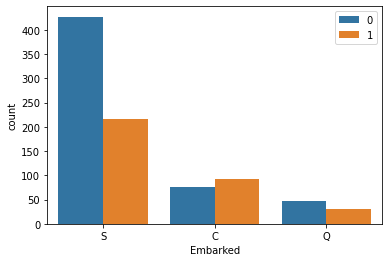

In [21]:
sns.countplot(
    x = df_train["Embarked"],
    hue = pd.Categorical(df_train["Survived"])
)

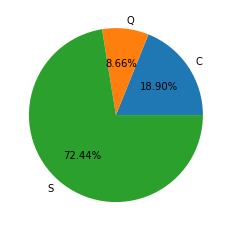

In [22]:
plt.pie(
    data = df_train.groupby("Embarked").size().reset_index(name = "Count"),
    x = "Count",
    labels = "Embarked",
    autopct = "%.2f%%"
)
plt.show()

## test dataset

In [23]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [24]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [25]:
df_test["Pclass"] = df_test["Pclass"].astype(str)

In [26]:
df_test.isna().sum()[df_test.isna().sum() > 0]

Age       86
Fare       1
Cabin    327
dtype: int64

# Imputation
According to the age column in the dataset, it has so many NA values. To get rid of NA values, I will use the imputation technique. A simple technique that replaces NA with the mean value.

In [27]:
from sklearn.impute import SimpleImputer

STRATEGY_NUMERIC = "median"

In [28]:
df_train.isna().sum()[df_train.isna().sum() > 0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [29]:
df_test.isna().sum()[df_test.isna().sum() > 0]

Age       86
Fare       1
Cabin    327
dtype: int64

In [30]:
def impute_missing_data(df, cols, strategy):
    imputer = SimpleImputer(strategy = strategy)
    imputer.fit(df_train[cols])
    df[cols] = imputer.transform(df[cols])

## Embarked column

In [31]:
df_train["Embarked"].fillna("S", inplace = True)

In [32]:
df_train.isna().sum()["Embarked"]

0

## Age column

In [33]:
def impute_age(df, pclass):
    temp = df["Pclass"] == pclass
    df.loc[df["Age"].isna() & temp, "Age"] = age_median[pclass]

In [34]:
for pclass in ["1", "2", "3"]:
    impute_age(df_train, pclass)
    impute_age(df_test, pclass)

In [35]:
df_train.isna().sum()["Age"]

0

In [36]:
df_test.isna().sum()["Age"]

0

## Fare column

In [37]:
impute_missing_data(df_test, ["Fare"], STRATEGY_NUMERIC)

In [38]:
df_test.isna().sum()["Fare"]

0

# Prepare data for model training

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [40]:
drop_cols = ["PassengerId", "Name", "Ticket", "Cabin"]
TARGET = "Survived"

In [41]:
df_train_class = df_train.copy()
df_test_class = df_test.copy()

In [42]:
X = df_train_class.drop(TARGET, axis = 1)
y = df_train_class[TARGET]

In [43]:
X_test = df_test_class.copy()

In [44]:
X.drop(drop_cols, axis = 1, inplace = True)
X_test.drop(drop_cols, axis = 1, inplace = True)

## Log transform

In [45]:
cols = ["Fare"]
X[cols] = np.log(1 + X[cols])
X_test[cols] = np.log(1 + X_test[cols])

## Encoding and scaling

In [46]:
numerical_cols = [cname for cname in X.columns if X[cname].dtype in ["int64", "float64"]]
categorical_cols = [cname for cname in X.columns if X[cname].dtype == "object"]

In [47]:
numerical_pipe = Pipeline(
    steps = [
        ("scaler", StandardScaler())
    ]
)
categorical_pipe = Pipeline(
    steps = [
        ("ohe", OneHotEncoder(drop = "if_binary", handle_unknown = "ignore", sparse = False))
    ]
)

In [48]:
# Combine preprocessing
ct = ColumnTransformer(
    transformers = [
        ("num", numerical_pipe, numerical_cols), 
        ("cat", categorical_pipe, categorical_cols)
    ], 
    remainder = "passthrough"
)

# Apply preprocessing
X = ct.fit_transform(X)
X_test = ct.transform(X_test)

In [49]:
X.shape

(891, 11)

# Train and test
This problem is a binary classification problem. So, there are many methods commonly used for [binary classification](https://en.wikipedia.org/wiki/Binary_classification).

So, I decided to use some of the methods commonly used for binary classification

*You could try more if you want to. Just have fun with it :)*

In [50]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier

In [51]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [52]:
classifiers = {
    "LogisticRegression": LogisticRegression(random_state = 0),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(random_state = 0, probability = True),
    "RandomForest": RandomForestClassifier(random_state = 0),
    "LGBM": LGBMClassifier(random_state = 0),
    "NaiveBayes": GaussianNB()
}

In [53]:
from sklearn.metrics import accuracy_score, make_scorer

In [54]:
accuracy_scorer = make_scorer(accuracy_score)

In [55]:
FOLDS = 10
kfold = StratifiedKFold(n_splits = FOLDS, shuffle = True, random_state = 0)

In [56]:
scores = []
for name, model in classifiers.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv = kfold, scoring = accuracy_scorer)
    mean = cv_scores.mean()
    std = cv_scores.std()
    scores.append([mean, std])

In [57]:
scores_df = pd.DataFrame(
    scores, 
    index = [name for name in classifiers.keys()], 
    columns = ["Mean Acc", "SD"]
)
scores_df.sort_values(by = "Mean Acc", ascending = False, inplace = True)

In [58]:
scores_df

,Mean Acc,SD
SVC,0.823707,0.061701
LGBM,0.801178,0.050516
LogisticRegression,0.799642,0.067791
KNN,0.791449,0.053299
RandomForest,0.777112,0.056242
NaiveBayes,0.761111,0.070314


# Conclusion

In [59]:
top_classifiers = {
    "SVC": SVC(random_state = 0, probability = True),
    "LGBM": LGBMClassifier(random_state = 0)
}

In [60]:
y_pred = np.zeros(len(X_test))
for name, model in top_classifiers.items():
    cv = StratifiedKFold(n_splits = FOLDS, shuffle = True, random_state = 0)
    score = 0
    for fold, (train_idx, val_idx) in enumerate(cv.split(X, y)):
        # Get training and validation sets
        X_train, X_valid = X[train_idx], X[val_idx]
        y_train, y_valid = y[train_idx], y[val_idx]

        # Train model
        clf = model
        clf.fit(X_train, y_train)

        # Make predictions and measure accuracy
        y_pred += clf.predict_proba(X_test)[:, 1]
        score += clf.score(X_valid, y_valid)

    # Average accuracy    
    score = score/FOLDS

    # Print accuracy and time
    print("Model:", name)
    print("Average validation accuracy:", np.round(100 * score, 2))
    print("")

Model: SVC
Average validation accuracy: 82.04

Model: LGBM
Average validation accuracy: 83.61



In [61]:
y_pred = y_pred/(FOLDS * len(top_classifiers))

# Submission

In [62]:
submission = pd.DataFrame({
    "PassengerId": df_test["PassengerId"],
    "Survived": y_pred.round()
})

submission.to_csv("submission.csv", index = False)

In [63]:
submission = pd.read_csv("submission.csv")
submission.head()

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,0.0


<AxesSubplot:xlabel='Survived', ylabel='count'>

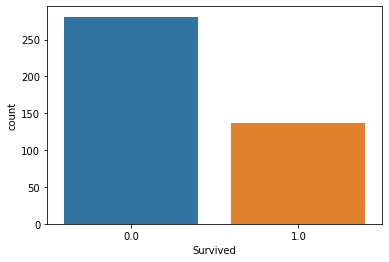

In [64]:
sns.countplot(
    data = submission,
    x = "Survived"
)